In [1]:
%matplotlib inline
from preamble import *

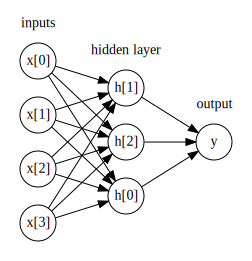

In [2]:
display(mglearn.plots.plot_single_hidden_layer_graph())

## Nadzorowane uczenie maszynowe
### Klasyfikacja i regresja

### Uogólnianie, nadmierne dopasowanie i niedopasowanie

![model_complexity](images/overfitting_underfitting_cartoon.png)

#### Relacja złożoności modelu do rozmiaru zestawu danych

### Nadzorowane algorytmy uczenia maszynowego
#### Przykładowe zbiory danych

X.shape: (26, 2)


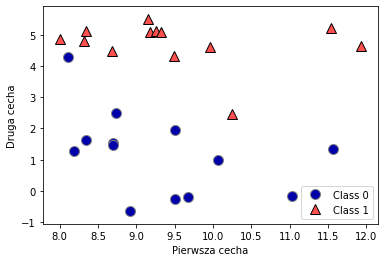

In [3]:
# wygeneruj zbiór danych
X, y = mglearn.datasets.make_forge()
# stwórz wykres
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Pierwsza cecha")
plt.ylabel("Druga cecha")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Cel')

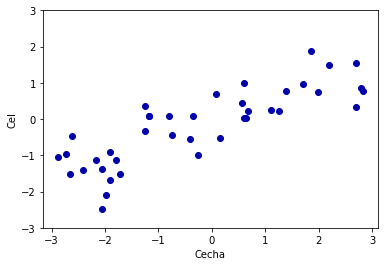

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Cecha")
plt.ylabel("Cel")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("Kształt danych cancer: {}".format(cancer.data.shape))

Kształt danych cancer: (569, 30)


In [7]:
print("Liczba próbek na klasę:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


Liczba próbek na klasę:
{'malignant': 212, 'benign': 357}


In [8]:
print("Nazwy cech:\n{}".format(cancer.feature_names))

Nazwy cech:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Kształt danych: {}".format(boston.data.shape))

Kształt danych: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


#### k-najbliższych sąsiadów
##### Klasyfikacja k-sąsiadów

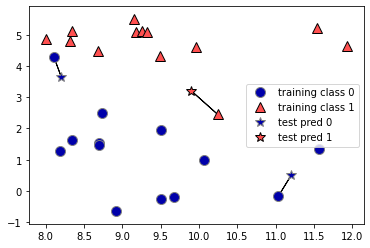

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

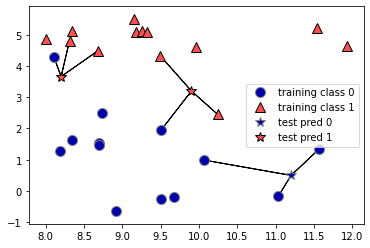

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("Prognozy na zestawie testowym: {}".format(clf.predict(X_test)))

Prognozy na zestawie testowym: [1 0 1 0 1 0 0]


In [17]:
print("Dokładność na zestawie testowym: {:.2f}".format(clf.score(X_test, y_test)))

Dokładność na zestawie testowym: 0.86


##### Analiza KNeighborsClassifier

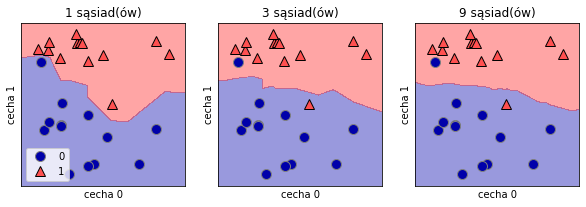

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # metoda fit zwraca obiekt self, więc możemy utworzyć instancję
    # i dopasować ją do jednej linii
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} sąsiad(ów)".format(n_neighbors))
    ax.set_xlabel("cecha 0")
    ax.set_ylabel("cecha 1")
axes[0].legend(loc=3)


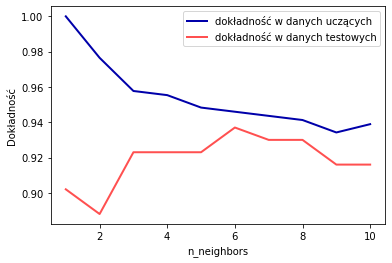

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# spróbuj n_neighbors od 1 do 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # zbuduj model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # zapisz dokładność zestawu uczącego
    training_accuracy.append(clf.score(X_train, y_train))
    # zapisz dokładność uogólniania
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="dokładność w danych uczących")
plt.plot(neighbors_settings, test_accuracy, label="dokładność w danych testowych")
plt.ylabel("Dokładność")
plt.xlabel("n_neighbors")
plt.legend()


##### Regresja k-sąsiadów

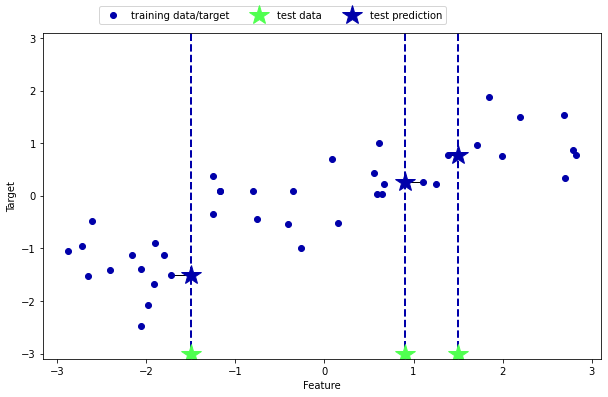

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

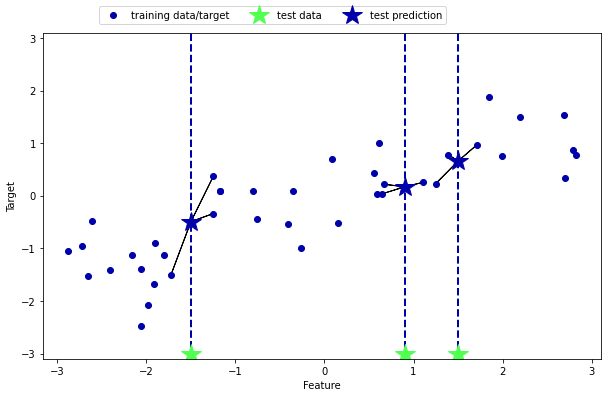

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# podziel zbiór danych wave na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# utwórz instancję modelu i ustaw do rozważenia 3 sąsiadów
reg = KNeighborsRegressor(n_neighbors=3)
# dopasuj model przy użyciu danych uczących i celów uczących
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("Prognozy dotyczące zestawu testowego:\n{}".format(reg.predict(X_test)))

Prognozy dotyczące zestawu testowego:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [24]:
print("Zestaw testowy R^2: {:.2f}".format(reg.score(X_test, y_test)))

Zestaw testowy R^2: 0.83


#### Analiza KNeighborsRegressor

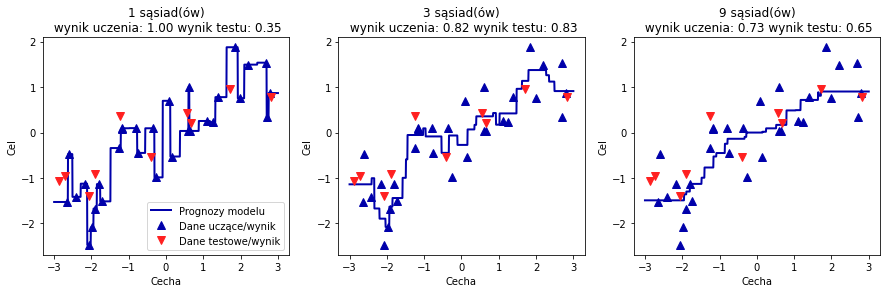

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# stwórz 1,000 punktów danych, równo rozmieszczonych pomiędzy -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # dokonaj prognozy z użyciem 1, 3, lub 9 sąsiadów
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} sąsiad(ów)\n wynik uczenia: {:.2f} wynik testu: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Cecha")
    ax.set_ylabel("Cel")
axes[0].legend(["Prognozy modelu", "Dane uczące/wynik",
    "Dane testowe/wynik"], loc="best")


##### Mocne i słabe strony i parametry

#### Modele liniowe 
##### Modele liniowe do regresji
\begin{align*}
\end{align*}

w[0]: 0.393906  b: -0.031804


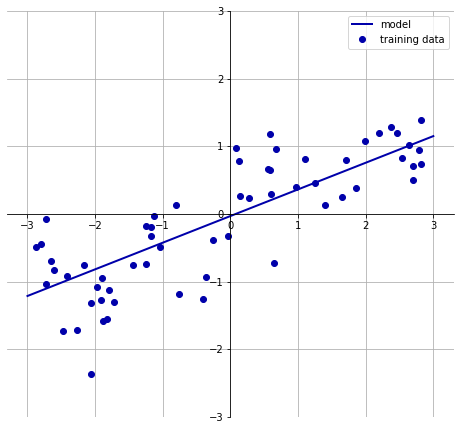

In [26]:
mglearn.plots.plot_linear_regression_wave()

#### Regresja liniowa (inaczej zwykła metoda najmniejszych kwadratów)

In [27]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [29]:
print("Wynik zestawu uczącego: {:.2f}".format(lr.score(X_train, y_train)))
print("Wynik zestawu testowego: {:.2f}".format(lr.score(X_test, y_test)))

Wynik zestawu uczącego: 0.67
Wynik zestawu testowego: 0.66


In [30]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print("Wynik dla zestawu uczącego: {:.2f}".format(lr.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lr.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.95
Wynik dla zestawu testowego: 0.61


##### Regresja grzbietowa

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(ridge.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(ridge.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.89
Wynik dla zestawu testowego: 0.75


In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(ridge10.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.79
Wynik dla zestawu testowego: 0.64


In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(ridge01.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.93
Wynik dla zestawu testowego: 0.77


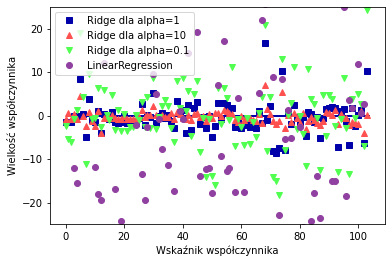

In [35]:
plt.plot(ridge.coef_, 's', label="Ridge dla alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge dla alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge dla alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Wskaźnik współczynnika")
plt.ylabel("Wielkość współczynnika")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

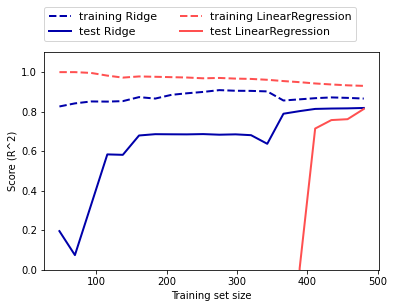

In [36]:
mglearn.plots.plot_ridge_n_samples()

##### Model Lasso

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lasso.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lasso.score(X_test, y_test)))
print("Liczba użytych cech: {}".format(np.sum(lasso.coef_ != 0)))

Wynik dla zestawu uczącego: 0.29
Wynik dla zestawu testowego: 0.21
Liczba użytych cech: 4


In [38]:
# zwiększamy domyślne ustawienie "max_iter",
# w innym przypadku model poinformuje, że należy zwiększyć max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Liczba użytych cech: {}".format(np.sum(lasso001.coef_ != 0)))

Wynik dla zestawu uczącego: 0.90
Wynik dla zestawu testowego: 0.77
Liczba użytych cech: 33


In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Liczba użytych cech: {}".format(np.sum(lasso00001.coef_ != 0)))

Wynik dla zestawu uczącego: 0.95
Wynik dla zestawu testowego: 0.64
Liczba użytych cech: 96


Text(0, 0.5, 'Wielkość współczynnika')

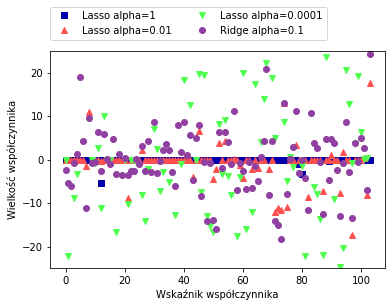

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Wskaźnik współczynnika")
plt.ylabel("Wielkość współczynnika")

##### Modele liniowe do klasyfikacji

\begin{align*}
\end{align*}

c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


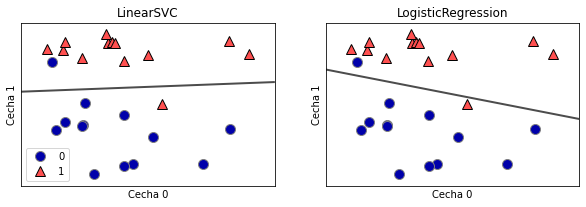

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Cecha 0")
    ax.set_ylabel("Cecha 1")
axes[0].legend()


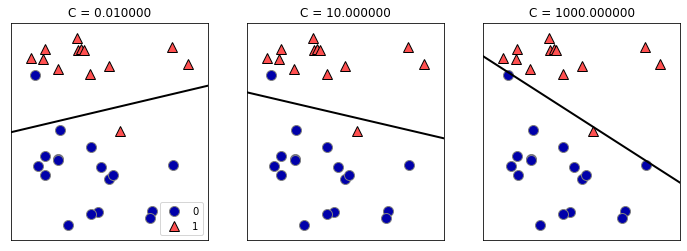

In [42]:
mglearn.plots.plot_linear_svc_regularization()

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.3f}".format(logreg.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.3f}".format(logreg.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.946
Wynik dla zestawu testowego: 0.958


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.3f}".format(logreg100.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.946
Wynik dla zestawu testowego: 0.958


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.3f}".format(logreg001.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.937
Wynik dla zestawu testowego: 0.930


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


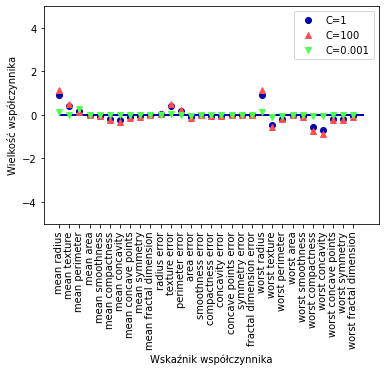

In [46]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Wskaźnik współczynnika")
plt.ylabel("Wielkość współczynnika")
plt.legend()

Dokładność dla danych uczących modelu l1 logreg z C=0.001: 0.91
Dokładność dla danych testowych modelu l1 logreg z C=0.001: 0.92
Dokładność dla danych uczących modelu l1 logreg z C=1.000: 0.96
Dokładność dla danych testowych modelu l1 logreg z C=1.000: 0.96
Dokładność dla danych uczących modelu l1 logreg z C=100.000: 0.99
Dokładność dla danych testowych modelu l1 logreg z C=100.000: 0.98


c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


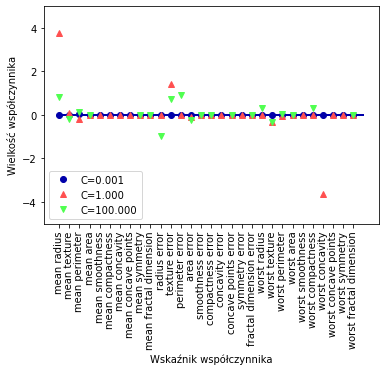

In [47]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Dokładność dla danych uczących modelu l1 logreg z C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Dokładność dla danych testowych modelu l1 logreg z C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Wskaźnik współczynnika")
plt.ylabel("Wielkość współczynnika")

plt.ylim(-5, 5)
plt.legend(loc=3)


##### Modele liniowe dla klasyfikacji wieloklasowej
\begin{align*}
\end{align*}

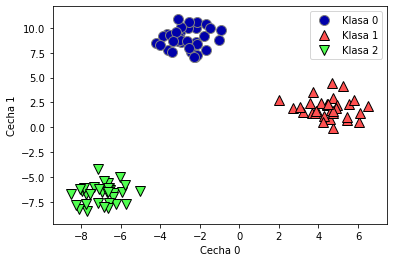

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")
plt.legend(["Klasa 0", "Klasa 1", "Klasa 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("Kształt współczynnika: ", linear_svm.coef_.shape)
print("Kształt przecięcia: ", linear_svm.intercept_.shape)

Kształt współczynnika:  (3, 2)
Kształt przecięcia:  (3,)


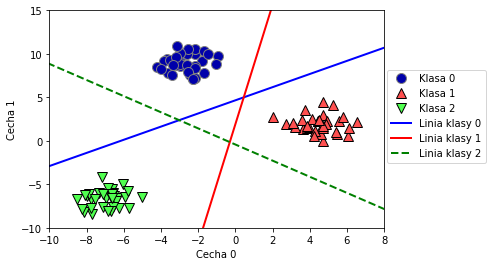

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")
plt.legend(['Klasa 0', 'Klasa 1', 'Klasa 2', 'Linia klasy 0', 'Linia klasy 1', 'Linia klasy 2'], loc=(1.01, 0.3))


Text(0, 0.5, 'Cecha 1')

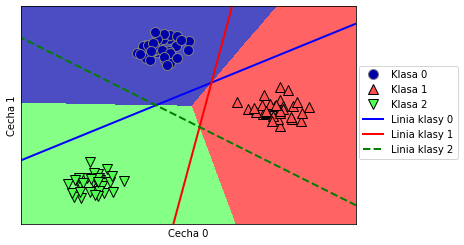

In [51]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Klasa 0', 'Klasa 1', 'Klasa 2', 'Linia klasy 0', 'Linia klasy 1', 'Linia klasy 2'], loc=(1.01, 0.3))
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")


#### Mocne, słabe punkty i parametry

In [52]:
# w jednym wierszu utwórz instancję modelu i wywołaj jego metodę fit
logreg = LogisticRegression().fit(X_train, y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naiwne klasyfikatory Bayesa

In [55]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [56]:
counts = {}
for label in np.unique(y):
    # iteruj po każdej klasie
    # zlicz (sumę) wpisów po jednej na cechę
    counts[label] = X[y == label].sum(axis=0)
print("Sumy cech:\n", counts)

Sumy cech:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### Mocne i słabe strony oraz parametry

### Drzewa decyzyjne 

In [57]:
import sys
sys.path

['C:\\Users\\jorke\\Dropbox\\translations\\machine_learning\\introduction_to_ml_with_python-master',
 'c:\\python38\\python38.zip',
 'c:\\python38\\DLLs',
 'c:\\python38\\lib',
 'c:\\python38',
 '',
 'c:\\python38\\lib\\site-packages',
 'c:\\python38\\lib\\site-packages\\win32',
 'c:\\python38\\lib\\site-packages\\win32\\lib',
 'c:\\python38\\lib\\site-packages\\Pythonwin',
 'c:\\python38\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\jorke\\.ipython']

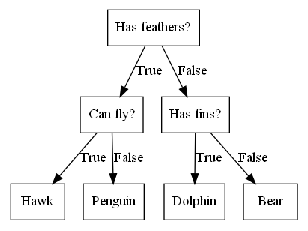

In [58]:
mglearn.plots.plot_animal_tree()

##### Budowanie drzew decyzyjnych

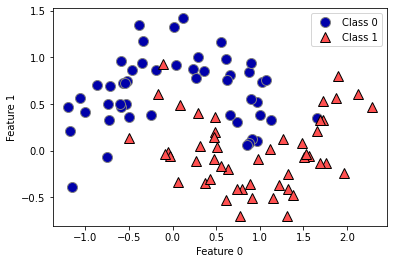

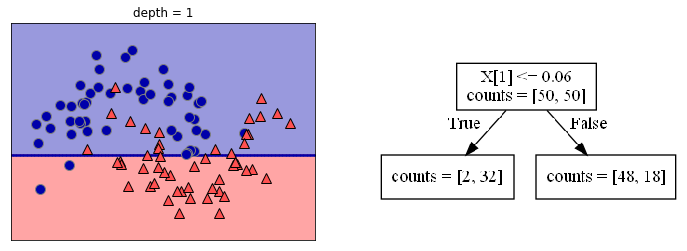

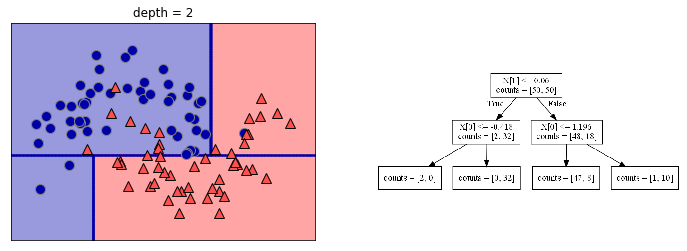

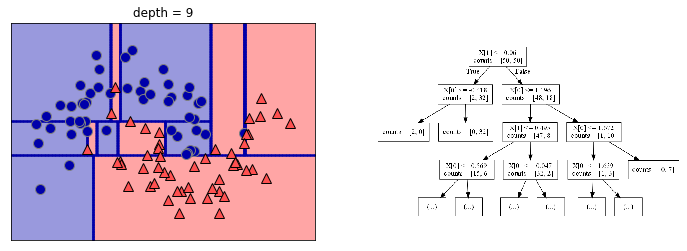

In [59]:
mglearn.plots.plot_tree_progressive()

##### Kontrolowanie złożoności drzew decyzyjnych

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Dokładność na zestawie uczącym: {:.3f}".format(tree.score(X_train, y_train)))
print("Dokładność na zestawie testowym: {:.3f}".format(tree.score(X_test, y_test)))

Dokładność na zestawie uczącym: 1.000
Dokładność na zestawie testowym: 0.937


In [61]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Dokładność na zestawie uczącym: {:.3f}".format(tree.score(X_train, y_train)))
print("Dokładność na zestawie testowym: {:.3f}".format(tree.score(X_test, y_test)))

Dokładność na zestawie uczącym: 0.988
Dokładność na zestawie testowym: 0.951


#### Analiza drzew decyzyjnych

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="drzewo.dot", class_names=["zlosliwy", "lagodny "], feature_names=cancer.feature_names, impurity=False, filled=True)


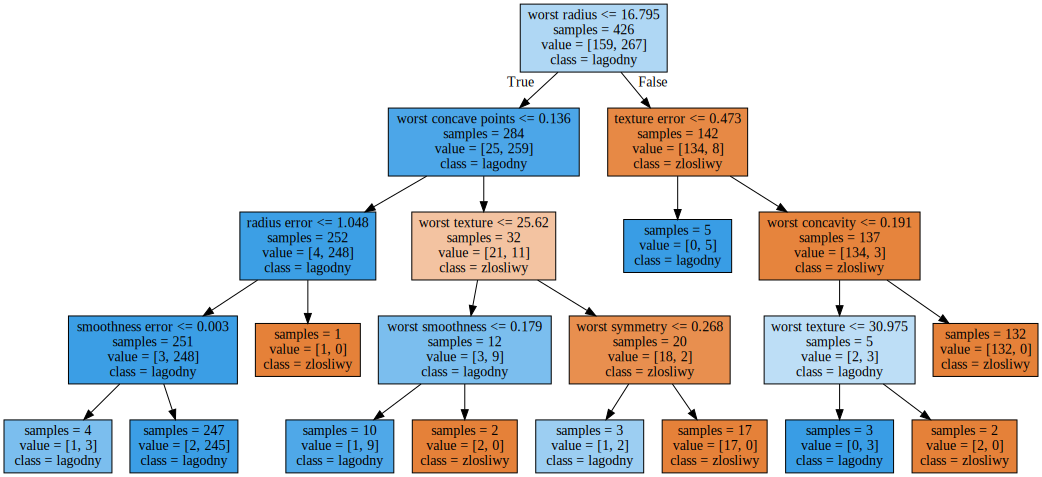

In [63]:
import graphviz
with open("drzewo.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


#### Ważność cech w drzewach

In [64]:
print("Ważność cech:")
print(tree.feature_importances_)

Ważność cech:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


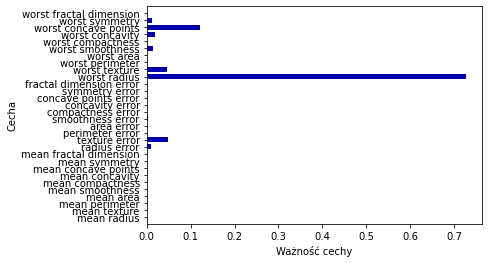

In [65]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Ważność cechy")
    plt.ylabel("Cecha")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


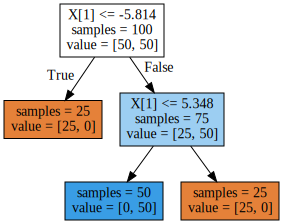

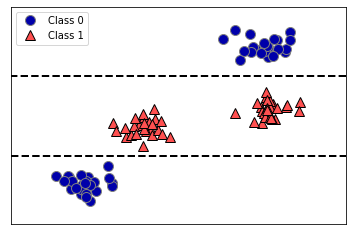

In [66]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Cena w $/Mb')

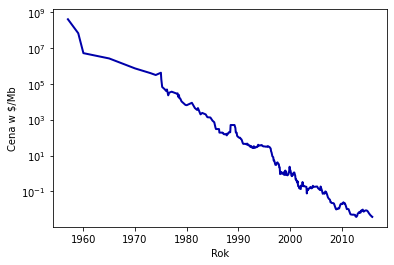

In [67]:
import os
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Rok")
plt.ylabel("Cena w $/Mb")


In [68]:
from sklearn.tree import DecisionTreeRegressor
# wykorzystaj dane historyczne do prognozowania cen po 2000 r
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# dokonaj prognozy ceny na podstawie daty
X_train = data_train.date[:, np.newaxis]
# aby uzyskać prostszą relację danych do celu używamy transformacji logarytmicznej
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# dokojan prognozy na wszystkich danych
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# cofnij transformacje logarytmiczną
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


<ipython-input-68-3f04e1686eef>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-68-3f04e1686eef>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


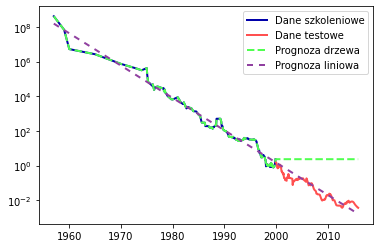

In [69]:
plt.semilogy(data_train.date, data_train.price, label="Dane szkoleniowe")
plt.semilogy(data_test.date, data_test.price, label="Dane testowe")
plt.semilogy(ram_prices.date, price_tree, label="Prognoza drzewa")
plt.semilogy(ram_prices.date, price_lr, label="Prognoza liniowa")
plt.legend()


#### Mocne, słabe strony i parametry

#### Zespoły drzew decyzyjnych
##### Lasy losowe
###### Budowanie lasów losowych 
###### Analiza lasów losowych

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

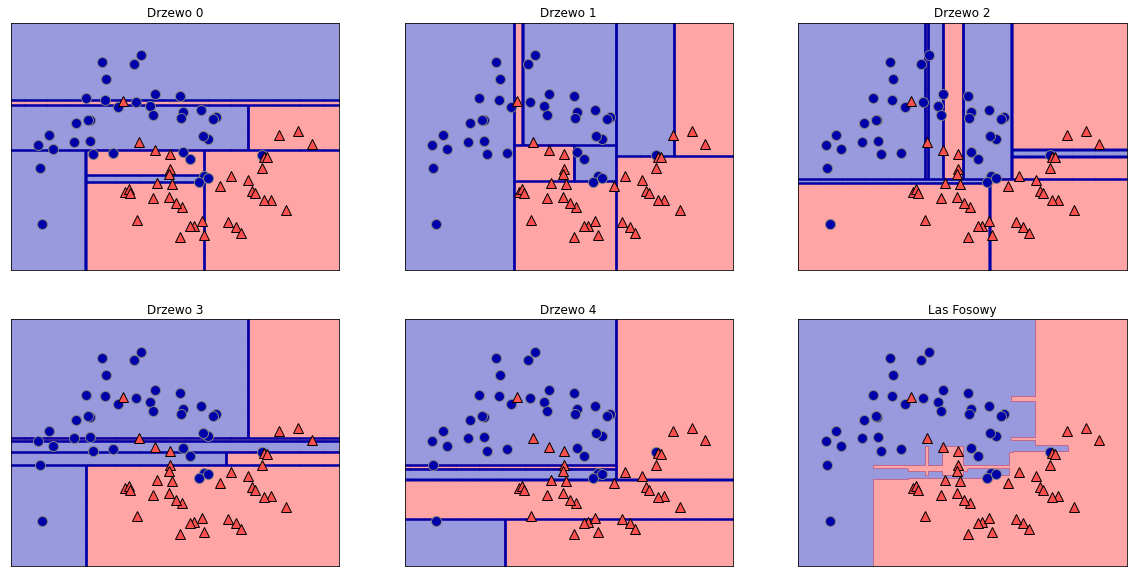

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Drzewo {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Las Fosowy")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Dokładność na danych uczących: {:.3f}".format(forest.score(X_train, y_train)))
print("Dokładność na danych testowych: {:.3f}".format(forest.score(X_test, y_test)))

Dokładność na danych uczących: 1.000
Dokładność na danych testowych: 0.972


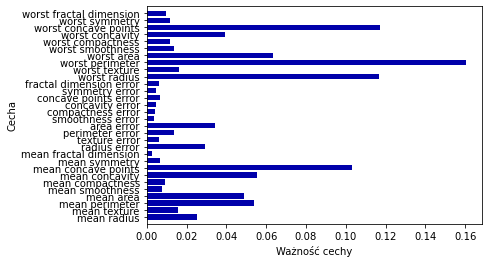

In [73]:
plot_feature_importances_cancer(forest)

###### Mocne i słabe strony oraz parametry

#### Drzewa regresji ze wzmocnieniem gradientowym (maszyny ze wzmocnieniem gradientowym)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Dokładność na danych uczących: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Dokładność na danych testowych: {:.3f}".format(gbrt.score(X_test, y_test)))

Dokładność na danych uczących: 1.000
Dokładność na danych testowych: 0.965


In [75]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Dokładność na danych uczących: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Dokładność na danych testowych: {:.3f}".format(gbrt.score(X_test, y_test)))


Dokładność na danych uczących: 0.991
Dokładność na danych testowych: 0.972


In [76]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Dokładność na danych uczących: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Dokładność na danych testowych: {:.3f}".format(gbrt.score(X_test, y_test)))


Dokładność na danych uczących: 0.988
Dokładność na danych testowych: 0.965


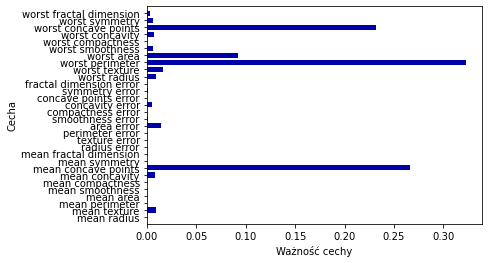

In [77]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Mocne i słabe strony oraz parametry

#### Maszyny wektorów nośnych
#### Modele liniowe i cechy nieliniowe

Text(0, 0.5, 'Cecha 1')

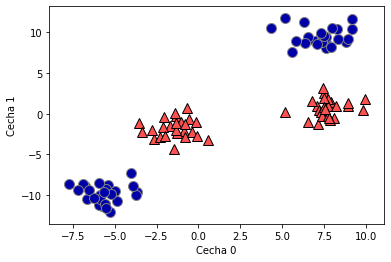

In [78]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Cecha 1')

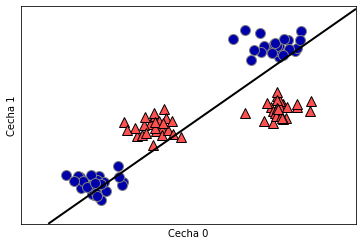

In [79]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

Text(0.5, 0, 'cecha1 ** 2')

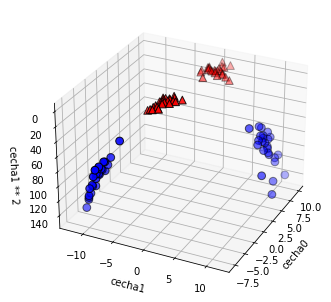

In [80]:
# dodaj pierwszą cechę podniesioną do kwadratu
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# zwizualizuj w 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# umieść na wykresie wszystkie punkty z y=0 a następnie wszystkie z y=1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',            cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("cecha0")
ax.set_ylabel("cecha1")
ax.set_zlabel("cecha1 ** 2")


c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'cecha1 ** 2')

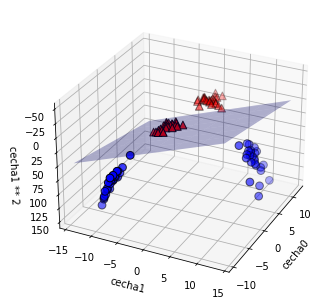

In [81]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# pokaż liniową granicę decyzyjną
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("cecha0")
ax.set_ylabel("cecha1")
ax.set_zlabel("cecha1 ** 2")

Text(0, 0.5, 'Cecha 1')

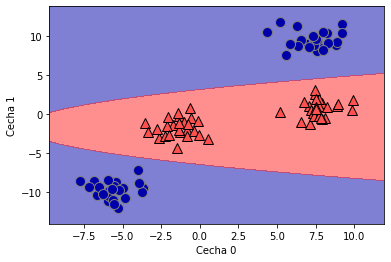

In [82]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

#### "Kernel trick"
#### SVM
\begin{align*}
\end{align*}

NameError: name 'sv_labels' is not defined

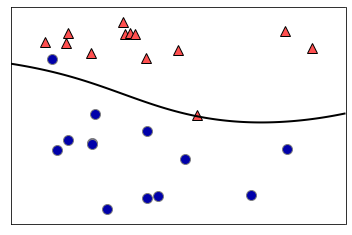

In [83]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# stwórz wykres wektorów pomocniczych
sv = svm.support_vectors_
# etykiety klas wektorów nośnych są podane za pomocą podwójnych współczynników sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

#### Dostrajanie parametrów SVM

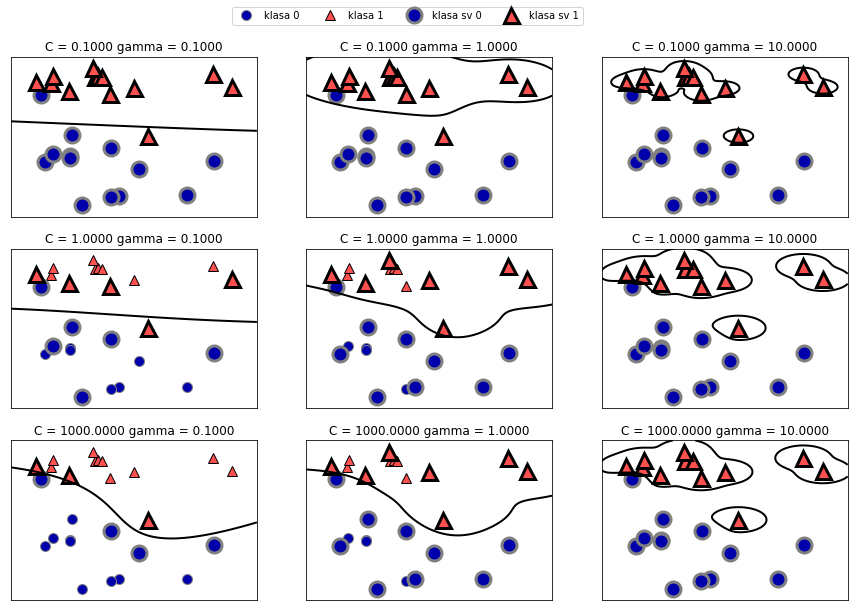

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["klasa 0", "klasa 1", "klasa sv 0", "klasa sv 1"],
                  ncol=4, loc=(.9, 1.2))

Dokładność na danych uczących: 0.90
Dokładność na danych testowych: 0.94


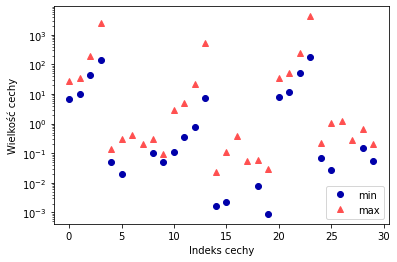

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Dokładność na danych uczących: {:.2f}".format(svc.score(X_train, y_train)))
print("Dokładność na danych testowych: {:.2f}".format(svc.score(X_test, y_test)))

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Indeks cechy")
plt.ylabel("Wielkość cechy")
plt.yscale("log")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Dokładność na danych uczących: {:.2f}".format(svc.score(X_train, y_train)))
print("Dokładność na danych testowych: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Wstępne przetwarzanie danych dla maszyn SVM

In [ ]:
# oblicz minimalną wartość dla cechy w zestawie uczącym
min_on_training = X_train.min(axis=0)
# obliczyć zakres każdej cechy (max - min) w zbiorze uczącym
range_on_training = (X_train - min_on_training).max(axis=0)
# odejmij min, a następnie podziel przez zakres,
# min = 0 i max = 1 dla każdej cechy
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum dla każdej cechy\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum dla każdej cechy\n {}".format(X_train_scaled.max(axis=0)))

In [ ]:
# użyj TEJ SAMEJ transformacji na zbiorze testowym,
# używaj min i zakresu zbioru uczącego (szczegóły w Rozdziale 3)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Dokładność na danych uczących: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Dokładność na danych testowych: {:.3f}".format(svc.score(X_test_scaled, y_test)))


#### Mocne i słabe strony oraz parametry

### Sieci neuronowe (głębokie uczenie)
#### Model sieci neuronowej

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Dostrajanie sieci neuronowych

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

In [ ]:
mlp = MLPClassifier(solver='l-bfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

In [ ]:
# używaj dwóch ukrytych warstw, po 10 jednostek każda
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

In [ ]:
# używaj dwóch ukrytych warstw, po 10 jednostek każda, tym razem z nieliniowością tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [ ]:
print("Maksymalne dane dotyczące raka dla każdej cechy:\n{}".format(cancer.data.max(axis=0))) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Dokładność na zestawie uczącym: {:.2f}".format(mlp.score(X_train, y_train)))
print("Dokładność na zestawie testowym: {:.2f}".format(mlp.score(X_test, y_test)))

In [ ]:
# oblicz średnią wartość dla cechy w zbiorze uczącym
mean_on_train = X_train.mean(axis=0)
# oblicz odchylenie standardowe każdej cechy w zbiorze uczącym
std_on_train = X_train.std(axis=0)
# odejmij średnią i skaluj przez odwrotne odchylenie standardowe
# później mean=0 i std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# użyj TEJ SAMEJ transformacji (przy użyciu mean i sdt) na zestawie testowym
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Dokładność na zestawie uczącym: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Dokładność na zestawie testowym: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Dokładność na zestawie uczącym: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Dokładność na zestawie testowym: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Dokładność na zestawie uczącym: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Dokładność na zestawie testowym: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Kolumny w macierzy wag")
plt.ylabel("Cecha wejściowa")
plt.colorbar()

#### Mocne i słabe strony oraz parametry
##### Szacowanie złożoności w sieciach neuronowych

### Szacunki niepewności na podstawie klasyfikatorów

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# w celach ilustracyjnych zmieniamy nazwy klas na "niebieski" i "czerwony"
y_named = np.array(["niebieski", "czerwony"])[y]
# możemy wywołać funkcję train_test_split z dowolną ilością tablic;
# wszystko zostanie podzielone w spójny sposób
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
# zbuduj model wzmocnienia gradientu
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)


#### The Decision Function

In [ ]:
print("X_test.shape: {}".format(X_test.shape))
print("Kształt funkcji decyzyjnej: {}".format(
gbrt.decision_function(X_test).shape))


In [ ]:
# pokaż kilka pierwszych wpisów, które zwraca funkcja decision_function
print("Funkcja decyzyjna:\n{}".format(gbrt.decision_function(X_test)[:6]))

In [ ]:
print("Wyniki funkcji decyzyjnej:\n{}".format(
gbrt.decision_function(X_test) > 0))
print("Prognozy:\n{}".format(gbrt.predict(X_test)))

In [ ]:
# przekrształć typ bool w wartości 0 i 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# użyj 0 i 1 jako indeksów atrybutu classes_
pred = gbrt.classes_[greater_zero]
# pred jest tym samym, co wynik gbrt.predict
print("pred jest równy prognozą: {}".format(
np.all(pred == gbrt.predict(X_test))))

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("Minimum funkcji decyzyjnej: {:.2f} maksimum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # umieść punkty uczące i testowe na wykresie
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Cecha 0")
    ax.set_ylabel("Cecha 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Klasa testowa 0", "Klasa testowa 1", "Klasa ucząca 0", "Klasa ucząca 1"], ncol=4, loc=(.1, 1.1))


#### Prognozy prawdopodobieństw

In [ ]:
print("Kształt prawdopodobieństw: {}".format(gbrt.predict_proba(X_test).shape))

In [ ]:
# pokaż kilka pierwszych wpisów z predict_proba
print("Prawdopodobieństwa prognoz:\n{}".format(gbrt.predict_proba(X_test[:6])))


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    # umieść punkty uczące i testowe na wykresie
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Cecha 0")
    ax.set_ylabel("Cecha 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Klasa testowa 0", "Klasa testowa 1", "Klasa ucząca 0", "Klasa ucząca 1"], ncol=4, loc=(.1, 1.1))


![classifier_comparison](images/classifier_comparison.png)

#### Niepewność w klasyfikacji wieloklasowej

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
print("Kształt funkcji decyzyjnej: {}".format(gbrt.decision_function(X_test).shape))
# umieść na wykresie kilka pierwszych wpisów z funkcji decyzyjnej
print("Funkcja decyzyjna:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

In [ ]:
print("Maksymalny argument funkcji decyzyjnej:\n{}".format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Prognozy:\n{}".format(gbrt.predict(X_test)))


In [ ]:
# wyświetl pierwsze kilka wpisów z wyniku funkcji predict_proba
print("Prognozowane prawdopodobieństwa:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# wyświetl sumy wszystkich wierszy, które wynoszą 1
print("Sumy: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

In [ ]:
print("Argmax prognozowanych prawdopodobieństw:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Prognozy:\n{}".format(gbrt.predict(X_test)))

In [ ]:
logreg = LogisticRegression()
# zaprezentuj każdy cel poprzez nazwę klasy w zestawie danych Iris
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unikalne klasy w danych uczących: {}".format(logreg.classes_))
print("prognozy: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax funkcji decyzyjnej: {}".format(argmax_dec_func[:10]))
print("argmax razem z classes_: {}".format(logreg.classes_[argmax_dec_func][:10]))

### Podsumowanie i przegląd